In [1]:
import pandas as pd
data = {'max_temp': []}
output = pd.DataFrame(data)

In [2]:
df = pd.read_csv(r'/content/AUS.csv')

In [3]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas
import requests_cache
import pandas as pd
from retry_requests import retry
import openmeteo_requests

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 30.2672,
	"longitude": -97.7431,
	"hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "rain", "snowfall", "wind_speed_10m", "wind_gusts_10m"],
	"daily": "temperature_2m_max",
	"start_date": "2024-04-04",
	"end_date": "2024-04-04"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(2).ValuesAsNumpy()
hourly_rain = hourly.Variables(3).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(4).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(5).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(6).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_max = daily.Variables(0).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["temperature_2m_max"] = daily_temperature_2m_max

daily_dataframe = pd.DataFrame(data = daily_data)
print(daily_dataframe)

Coordinates 30.269145965576172°N -97.75338745117188°E
Elevation 157.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                        date  temperature_2m  relative_humidity_2m  \
0  2024-04-04 00:00:00+00:00       26.643499                  18.0   
1  2024-04-04 01:00:00+00:00       22.993500                  25.0   
2  2024-04-04 02:00:00+00:00       19.743500                  36.0   
3  2024-04-04 03:00:00+00:00       17.643499                  45.0   
4  2024-04-04 04:00:00+00:00       15.243500                  56.0   
5  2024-04-04 05:00:00+00:00       15.193500                  48.0   
6  2024-04-04 06:00:00+00:00       13.693500                  51.0   
7  2024-04-04 07:00:00+00:00       11.543500                  68.0   
8  2024-04-04 08:00:00+00:00       10.843500                  73.0   
9  2024-04-04 09:00:00+00:00       10.693500                  67.0   
10 2024-04-04 10:00:00+00:00       10.243500                  68.0   
11 2024-04-04 11:00:00+00:00    

In [4]:
hourly_dataframe.drop(columns=['date'],inplace=True)

In [5]:
print(df)

                            date  temperature_2m  relative_humidity_2m  \
0      2014-01-01 00:00:00+00:00        8.842999             59.765373   
1      2014-01-01 01:00:00+00:00        7.443000             64.325210   
2      2014-01-01 02:00:00+00:00        6.593000             66.967186   
3      2014-01-01 03:00:00+00:00        5.993000             68.795320   
4      2014-01-01 04:00:00+00:00        5.443000             70.951390   
...                          ...             ...                   ...   
87667  2024-01-01 19:00:00+00:00       12.008500             51.478466   
87668  2024-01-01 20:00:00+00:00       12.808500             49.897438   
87669  2024-01-01 21:00:00+00:00       13.058500             49.438107   
87670  2024-01-01 22:00:00+00:00       12.758500             49.883600   
87671  2024-01-01 23:00:00+00:00       11.708500             52.693880   

       dew_point_2m  precipitation  rain  snowfall  wind_speed_10m  \
0            1.4430            0.0   0.0 

In [6]:
df.drop(columns=['wind_speed_100m'],inplace=True)

In [7]:
print(df.columns)

Index(['date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'precipitation', 'rain', 'snowfall', 'wind_speed_10m',
       'wind_gusts_10m'],
      dtype='object')


In [8]:
df.drop(columns=['date'],inplace=True)

In [9]:
df

,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snowfall,wind_speed_10m,wind_gusts_10m
0,8.842999,59.765373,1.4430,0.0,0.0,0.0,8.089993,11.879999
1,7.443000,64.325210,1.1430,0.0,0.0,0.0,9.107359,13.320000
2,6.593000,66.967186,0.8930,0.0,0.0,0.0,8.825508,14.400000
3,5.993000,68.795320,0.6930,0.0,0.0,0.0,8.311245,14.759999
4,5.443000,70.951390,0.5930,0.0,0.0,0.0,8.640000,14.759999
...,...,...,...,...,...,...,...,...
87667,12.008500,51.478466,2.3085,0.0,0.0,0.0,20.275383,37.079998
87668,12.808500,49.897438,2.6085,0.0,0.0,0.0,20.008356,37.079998
87669,13.058500,49.438107,2.7085,0.0,0.0,0.0,19.562946,36.360000
87670,12.758500,49.883600,2.5585,0.0,0.0,0.0,18.692286,34.920000


In [10]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


X = df[['relative_humidity_2m', 'precipitation', 'rain', 'snowfall', 'wind_speed_10m', 'wind_gusts_10m']]
y = df['temperature_2m']

X = pd.DataFrame(X, columns=['relative_humidity_2m', 'precipitation', 'rain', 'snowfall', 'wind_speed_10m', 'wind_gusts_10m'])
y = pd.DataFrame(y, columns=['temperature_2m'])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)
mse_lstm = model_lstm.evaluate(X_test, y_test)
print("Mean Squared Error (LSTM):", mse_lstm)


Epoch 1/30
2192/2192 [==============================] - 15s 5ms/step - loss: 0.0287
Epoch 2/30
2192/2192 [==============================] - 7s 3ms/step - loss: 0.0204
Epoch 3/30
2192/2192 [==============================] - 5s 2ms/step - loss: 0.0202
Epoch 4/30
2192/2192 [==============================] - 5s 2ms/step - loss: 0.0201
Epoch 5/30
2192/2192 [==============================] - 6s 3ms/step - loss: 0.0201
Epoch 6/30
2192/2192 [==============================] - 5s 2ms/step - loss: 0.0200
Epoch 7/30
2192/2192 [==============================] - 6s 3ms/step - loss: 0.0200
Epoch 8/30
2192/2192 [==============================] - 5s 2ms/step - loss: 0.0199
Epoch 9/30
2192/2192 [==============================] - 5s 2ms/step - loss: 0.0199
Epoch 10/30
2192/2192 [==============================] - 6s 3ms/step - loss: 0.0199
Epoch 11/30
2192/2192 [==============================] - 5s 2ms/step - loss: 0.0198
Epoch 12/30
2192/2192 [==============================] - 6s 3ms/step - loss: 0.0198


In [11]:
import numpy as np

for index, row in hourly_dataframe.iterrows():

    relative_humidity_2m = row['relative_humidity_2m']
    precipitation = row['precipitation']
    rain = row['rain']
    snowfall = row['snowfall']
    wind_speed_10m = row['wind_speed_10m']
    wind_gusts_10m = row['wind_gusts_10m']

    input_data = np.array([[relative_humidity_2m, precipitation, rain, snowfall, wind_speed_10m, wind_gusts_10m]])
    scale_input = scaler_x.transform(input_data)
    reshaped_input_data = scale_input.reshape((scale_input.shape[0], 1, scale_input.shape[1]))
    predicted_output = model_lstm.predict(reshaped_input_data)
    predicted_output = scaler_y.inverse_transform(predicted_output)
    output.at[index, 'max_temp'] = predicted_output[0][0]
print(output)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 584ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 28ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


     max_temp
0   36.716118
1   21.083475
2   15.461558
3   15.917291
4   11.589411
5   12.375521
6   13.640575
7   14.228562
8   13.305007
9   12.657033
10  13.646638
11  14.143520
12  13.621332
13  13.083841
14  17.576153
15  26.296255
16  25.967487
17  25.690022
18  24.307192
19  22.620485
20  24.731329
21  25.559044
22  23.587086
23  21.826046


In [12]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

model_lstm = Sequential()
model_lstm.add(LSTM(50,
                    input_shape=(X_train.shape[1], X_train.shape[2]),
                    kernel_regularizer=regularizers.l2(0.01)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.fit(X_train, y_train, epochs=60, batch_size=32, verbose=1)
mse_lstm = model_lstm.evaluate(X_test, y_test)
print("Mean Squared Error (LSTM):", mse_lstm)

Epoch 1/60
2192/2192 [==============================] - 14s 5ms/step - loss: 0.0358
Epoch 2/60
2192/2192 [==============================] - 11s 5ms/step - loss: 0.0229
Epoch 3/60
2192/2192 [==============================] - 5s 2ms/step - loss: 0.0226
Epoch 4/60
2192/2192 [==============================] - 6s 3ms/step - loss: 0.0222
Epoch 5/60
2192/2192 [==============================] - 5s 2ms/step - loss: 0.0220
Epoch 6/60
2192/2192 [==============================] - 6s 3ms/step - loss: 0.0217
Epoch 7/60
2192/2192 [==============================] - 5s 2ms/step - loss: 0.0216
Epoch 8/60
2192/2192 [==============================] - 6s 3ms/step - loss: 0.0216
Epoch 9/60
2192/2192 [==============================] - 5s 2ms/step - loss: 0.0214
Epoch 10/60
2192/2192 [==============================] - 7s 3ms/step - loss: 0.0214
Epoch 11/60
2192/2192 [==============================] - 5s 2ms/step - loss: 0.0213
Epoch 12/60
2192/2192 [==============================] - 5s 2ms/step - loss: 0.0213

In [13]:
import numpy as np

for index, row in hourly_dataframe.iterrows():

    relative_humidity_2m = row['relative_humidity_2m']
    precipitation = row['precipitation']
    rain = row['rain']
    snowfall = row['snowfall']
    wind_speed_10m = row['wind_speed_10m']
    wind_gusts_10m = row['wind_gusts_10m']

    input_data = np.array([[relative_humidity_2m, precipitation, rain, snowfall, wind_speed_10m, wind_gusts_10m]])
    scale_input = scaler_x.transform(input_data)
    reshaped_input_data = scale_input.reshape((scale_input.shape[0], 1, scale_input.shape[1]))
    predicted_output = model_lstm.predict(reshaped_input_data)
    predicted_output = scaler_y.inverse_transform(predicted_output)
    output.at[index, 'max_temp'] = predicted_output[0][0]
print(output)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
     max_temp
0   28.579308
1   23.845848
2   21.952154
3   21.806681
4   19.739540
5   20.722780
6   20.888859
7   19.510983
8   18.150372
9   18.652203
10  18.877337
11  18.387724
12  18.461130
13  17.877583
14  20.270042
15  24.700998
16  24.688848
17  24.882332
18  24.574261
19  23.991449
20  24.490826
21  24.795603
22  24.216751
23  23.530542


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Here We take the max value of the temperature we obtained from our prediction

In [14]:
max_temp_max = output['max_temp'].max()

The next cell is the actual max temp recorded today obtained from the weather api

In [15]:
daily_dataframe.temperature_2m_max[0]

31.0935

In [16]:
a=daily_dataframe.temperature_2m_max[0]
a=(a*9/5)+32
b=max_temp_max
c=(max_temp_max*9/5)+32
Offset_temp = max_temp_max-daily_dataframe.temperature_2m_max[0]
print("Offset_temp in Celsius is",b-daily_dataframe.temperature_2m_max[0])
print("Offset Temp in Farenheit is",c-a)

Offset_temp in Celsius is -2.514192581176758
Offset Temp in Farenheit is -4.525546646118173


 **Offset Temp mean how off the predicted values are from the actual values*

In [17]:
print(max_temp_max,"This is in Degree Celsius(Predicted)")
max_temp_max=(max_temp_max * 9/5) + 32
print(max_temp_max,"This is in Farenheit(Predicted)")

28.579307556152344 This is in Degree Celsius(Predicted)
83.44275360107422 This is in Farenheit(Predicted)


In [18]:
import json
data = {'max_temp_max': max_temp_max}
file_path = '/content/max_temp_max.json'
with open(file_path, 'w') as json_file:
    json.dump(data, json_file)

print("Value saved to", file_path)


Value saved to /content/max_temp_max.json


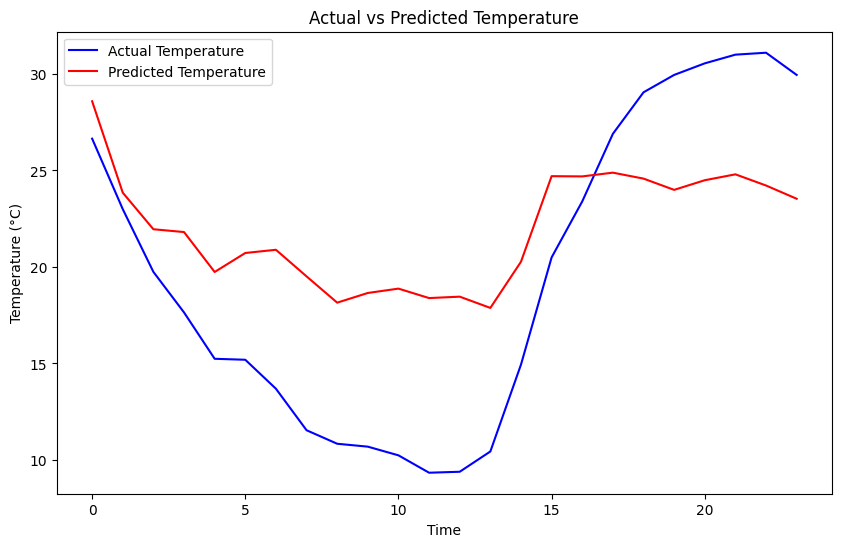

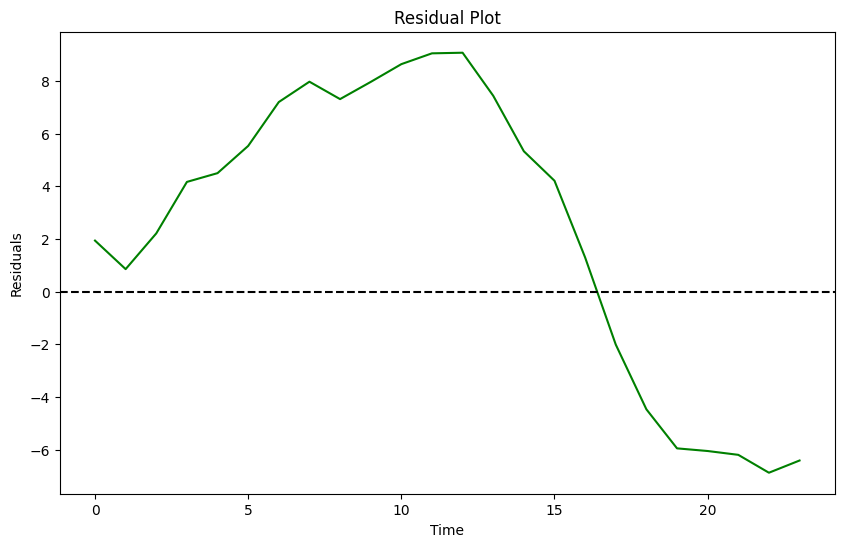

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(hourly_dataframe.index, hourly_dataframe['temperature_2m'], label='Actual Temperature', color='blue')
plt.plot(hourly_dataframe.index, output['max_temp'], label='Predicted Temperature', color='red')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()

residuals = output['max_temp'] - hourly_dataframe['temperature_2m']

plt.figure(figsize=(10, 6))
plt.plot(hourly_dataframe.index, residuals, color='green')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()



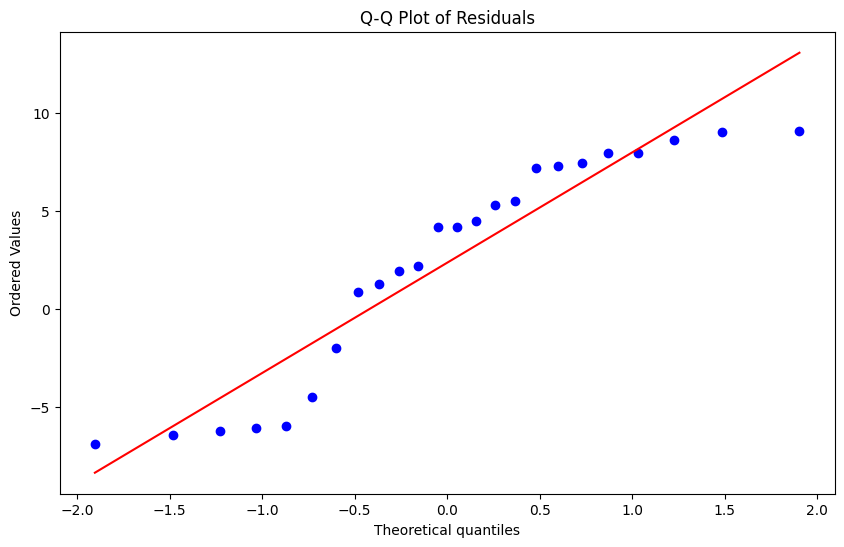

In [20]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [21]:
correlation_coefficient = np.corrcoef(hourly_dataframe['temperature_2m'], output['max_temp'])[0, 1]
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.8893556183303046


Correlation Coefficient: 0.8893556183303046 implies a Strong correlation.


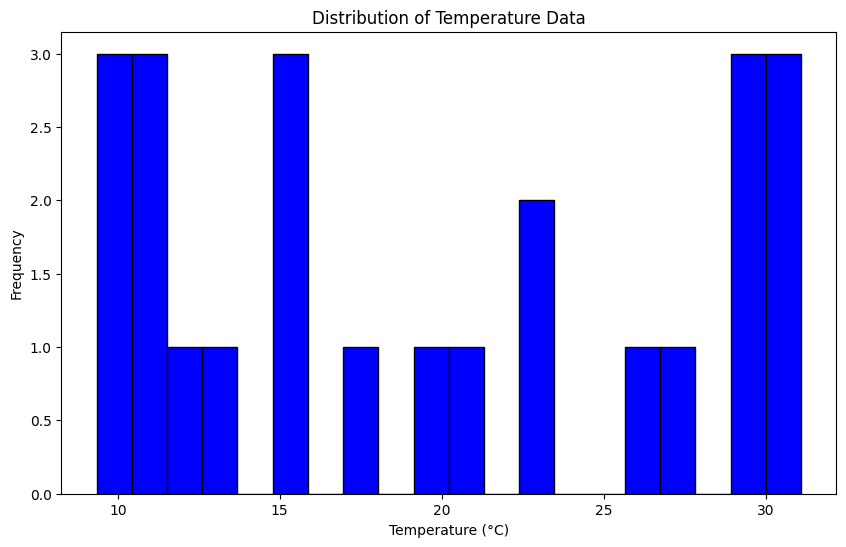

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(hourly_dataframe['temperature_2m'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature Data')
plt.show()
